In [1]:
import glob
import datetime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/BARIUM01_1m_20020101_20140103_ptrc_T.nc'
ptrc_obj = nc.Dataset(FName)
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [4]:
U_FName = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/vozocrtx_monmean.nc'
V_FName = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/vomecrty_monmean.nc'
u_obj = nc.Dataset(U_FName)
v_obj = nc.Dataset(V_FName)
U = u_obj.variables['vozocrtx'][:, :, :]
V = v_obj.variables['vomecrty'][:, :, :]

In [8]:
def ocean_current(time):
    u = U[time, :, :]
    v = V[time, :, :]
    ax=fig.gca()
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    speed = np.sqrt(u*u + v*v)
    proj.streamplot(x, y, u, v, color=speed, cmap=plt.cm.jet, linewidth=0.25*speed)


ValueError: The rows of 'x' must be equal

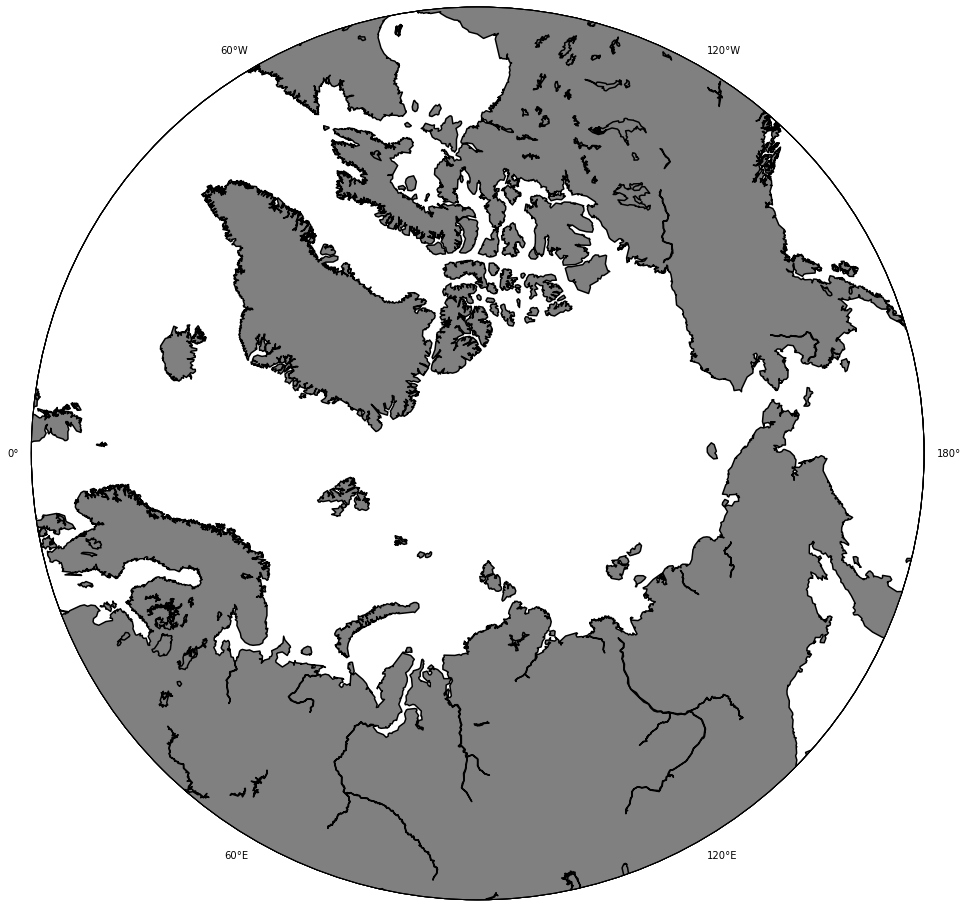

In [9]:
fig=plt.figure(figsize=(16, 16))
ocean_current(0)